# Deep Learning Book

## Libraries

In [19]:
#from sklearn.datasets import load_boston -> depricated in 1.3

# importing the Boston housing dataset from GitHub Gist
# The dataset can be found at: https://gist.github.com/nnbphuong/def91b5553736764e8e08f6255390f37
import pandas as pd
import numpy as np
boston = pd.read_csv("BostonHousing.csv")

# Importing necessary libraries
from sklearn.preprocessing import scale, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression, SGDRegressor
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
# show the first 5 rows of the dataset  
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


### Chapter 6: Laying Linear Regression Foundations

In [3]:
# scale the features and separate the target variable
X, y= scale(boston.drop("MEDV", axis=1)), boston["MEDV"]

In [4]:
# features array
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
        -1.0755623 , -0.44615259],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
        -0.49243937, -0.44615259],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
        -1.2087274 ,  2.24138563],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.98304761, -0.44615259],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.86530163, -0.44615259],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
        -0.66905833, -0.44615259]], shape=(506, 13))

In [5]:
# target variable array
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [6]:
# train the linear regression model
regression = LinearRegression()
regression.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [7]:
print('R2 %0.3f' % regression.score(X, y))

R2 0.842


In [8]:
print([a + ':' + str(round(b, 1)) for a, b in zip(boston.columns[:-1], regression.coef_)])

['CRIM:-1.1', 'ZN:-0.1', 'INDUS:0.8', 'CHAS:0.6', 'NOX:-1.8', 'RM:0.7', 'AGE:-0.2', 'DIS:-1.5', 'RAD:1.8', 'TAX:-1.6', 'PTRATIO:-1.2', 'LSTAT:-3.4', 'MEDV:4.4']


In [9]:
# Label Encoding vs One Hot Encoding for categorical variables
lbl = LabelEncoder()
enc = OneHotEncoder()
qualititative = ['red', 'red', 'green', 'blue', 'red', 'blue', 'blue', 'green']
labels = lbl.fit_transform(qualititative).reshape(8, 1)
print("Label Encoding: \n" , labels)
print("One Hot Encoding: \n", enc.fit_transform(labels).toarray())

Label Encoding: 
 [[2]
 [2]
 [1]
 [0]
 [2]
 [0]
 [0]
 [1]]
One Hot Encoding: 
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [10]:
# using Polynomial Features
pf = PolynomialFeatures(degree = 2)
poly_X = pf.fit_transform(X)

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.33, random_state = 42)
# training the model with polynomial features
reg_regression = Ridge(alpha=0.1)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' % r2_score(y_test, reg_regression.predict(X_test)))

R2: 0.902


In [11]:
# classification example with binary response
a = np.array([0, 0, 0, 0, 1, 1, 1, 1])
b = np.array([1, 2, 3, 4, 5, 6, 7, 8]).reshape(8, 1)
regression = LinearRegression()
regression.fit(b, a)
print(regression.predict(b) > 0.5)

[False False False False  True  True  True  True]


In [12]:
# using logistic regression for binary classification
binary_y = np.array(y >= 40).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, binary_y, test_size = 0.33, random_state = 42)
logistic = LogisticRegression()
logistic.fit(X_train, y_train)
print('In-sample accuracy: %0.3f' % accuracy_score(y_train, logistic.predict(X_train)))
print('Out-of-sample accuracy: %0.3f' % accuracy_score(y_test, logistic.predict(X_test)))

In-sample accuracy: 0.976
Out-of-sample accuracy: 0.982


In [13]:
# coefficients of the logistic regression model
for idx, coef in enumerate(logistic.coef_[0]):
    print(f"%7s : %7.3f" % (boston.columns[idx], coef))

   CRIM :   0.209
     ZN :  -0.062
  INDUS :   1.034
   CHAS :   0.131
    NOX :   0.196
     RM :   1.103
    AGE :  -0.528
    DIS :  -0.584
    RAD :   0.626
    TAX :   0.271
PTRATIO :  -0.383
  LSTAT :  -1.466
   MEDV :   2.027


In [14]:
print('\nclasses:', logistic.classes_)
np.set_printoptions(precision=2, suppress=True)
np.set_printoptions(precision=4, suppress=True)
print('\nProbs:\n', logistic.predict_proba(X_test)[:3, :])


classes: [0 1]

Probs:
 [[0.9999 0.0001]
 [0.7039 0.2961]
 [0.9996 0.0004]]


In [15]:
# defining the outcome of incompatible features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
check = [2 ** i for i in range(8)]
for i in range(2 ** 7 + 1):
    X_train = np.column_stack((X_train, np.random.random(X_train.shape[0])))
    X_test = np.column_stack((X_test, np.random.random(X_test.shape[0])))
    regression.fit(X_train, y_train)
    if i in check:
        print("Random features: %i -> R2: %0.3f" % (i, r2_score(y_train, regression.predict(X_train))))

Random features: 1 -> R2: 0.849
Random features: 2 -> R2: 0.849
Random features: 4 -> R2: 0.852
Random features: 8 -> R2: 0.854
Random features: 16 -> R2: 0.858
Random features: 32 -> R2: 0.872
Random features: 64 -> R2: 0.894
Random features: 128 -> R2: 0.916


In [16]:
# polynomial expansions uing L2 Ridge regularization
pf = PolynomialFeatures(degree = 2)
poly_X = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.33, random_state = 42)

reg_regression = Ridge(alpha = 0.1)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' % r2_score(y_test, reg_regression.predict(X_test)))

R2: 0.902


In [17]:
# using SGDRegressor for more unseen data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
SGD = SGDRegressor(penalty = None, learning_rate = 'invscaling', eta0 = 0.01, max_iter = 5, tol = None)

power = 17
check = [2 ** i for i in range(power + 1)]
for i in range(400):
    for j in range(X_train.shape[0]):
        SGD.partial_fit(X_train[j, :].reshape(1, 13), np.array([y_train.iloc[j]]))
        count = (j + 1) + X_train.shape[0] * i
        if count in check:
            R2 = r2_score(y_test, SGD.predict(X_test))
            print("Example %6i R2 %0.3f coef: %s" % (count, R2, ' '.join(map(lambda x: '%0.3f' % x, SGD.coef_))))

Example      1 R2 -6.264 coef: 0.112 -0.071 0.148 -0.040 0.075 -0.021 0.146 -0.113 0.243 0.224 0.118 0.110 -0.065
Example      2 R2 -6.185 coef: 0.065 -0.139 0.088 -0.078 0.055 -0.114 0.253 -0.054 0.154 0.140 0.281 0.152 -0.127
Example      4 R2 -6.105 coef: -0.074 -0.195 0.319 -0.171 0.064 -0.206 0.527 0.048 -0.040 0.266 0.075 0.353 -0.280
Example      8 R2 -5.792 coef: -0.250 -0.507 0.614 -0.345 0.101 0.011 0.813 -0.309 -0.095 0.333 -0.076 0.018 0.116
Example     16 R2 -5.155 coef: -0.442 -0.434 0.309 -0.575 0.008 0.002 0.528 -0.435 -0.277 0.297 -0.556 -0.061 0.273
Example     32 R2 -4.457 coef: -0.560 -0.326 0.447 1.212 0.055 0.289 0.399 -0.576 0.043 0.623 -0.369 -0.492 0.973
Example     64 R2 -2.931 coef: -0.953 0.316 0.174 1.661 -0.400 1.475 -0.389 -0.224 -0.029 0.463 -1.123 -1.765 2.878
Example    128 R2 -1.746 coef: -0.553 0.649 0.255 1.198 -0.563 1.515 -0.260 -0.173 -0.304 0.099 -1.791 -1.813 2.813
Example    256 R2 -0.526 coef: -0.860 0.318 0.073 1.332 -0.789 2.297 -0.317 -0.3

### Chapter 8: Building a Basic Neural Network

In [21]:
# defining a neural network with one input layer, one hidden layer with 3 neurons, and one output layer for binary classification
def init(inp, out):
    return np.random.randn(inp, out) / np.sqrt(inp)

def create_architecture(input_layer, first_layer, output_layer, random_seed = 0):
    np.random.seed(random_seed)
    layers = X.shape[1], 3, 1
    arch = list(zip(layers[:-1], layers[1:]))
    weights = [init(inp, out) for inp, out in arch]
    return weights

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_prime(s):
    return s * (1 - s)

def feed_forward(X, weights):
    a = X.copy()
    out = list()
    for W in weights:
        z = np.dot(a, W)
        a = sigmoid(z)
        out.append(a)
    return out

def accuracy(true_label, predicted):
    correct_preds = np.ravel(predicted) == true_label
    return np.sum(correct_preds) / len(true_label)

def backpropagation(l1, l2, weights, y):
    l2_error = y.reshape(-1, 1) - l2
    l2_delta = l2_error * sigmoid_prime(l2)
    l1_error = l2_delta.dot(weights[1].T)
    l1_delta = l1_error * sigmoid_prime(l1)
    return l2_error, l1_delta, l2_delta

def update_weights(X, l1, l1_delta, l2_delta, weights, alpha = 1.0):
    weights[1] = weights[1] + (alpha * l1.T.dot(l2_delta))
    weights[0] = weights[0] + (alpha * X.T.dot(l1_delta))
    return weights
def predict(X, weights):
    _, l2 = feed_forward(X, weights)
    preds = np.ravel((l2 > 0.5).astype(int))
    return preds

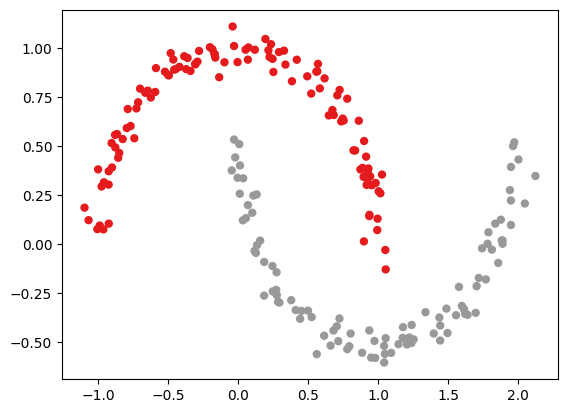

In [22]:
# solving a simple problem with a neural network
np.random.seed(0)
coord, cl = make_moons(n_samples = 300, noise = 0.05)
X, Xt, y, yt = train_test_split(coord, cl, test_size = 0.30, random_state = 0)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 25, cmap = plt.cm.Set1)
plt.show()

In [25]:
# perform training of the neural network
weights = create_architecture(X, 3, 1)
for j in range(30000 + 1 ):

    # first feed forward through the hidden layer
    l1, l2 = feed_forward(X, weights)

    # then, error backpropagation from output to input
    l2_error, l1_delta, l2_delta = backpropagation(l1, l2, weights, y)

    # finally, update the weights of the network
    weights = update_weights(X, l1, l1_delta, l2_delta, weights, alpha = 0.05)

    # from time to time, reporting the results
    if (j % 5000 == 0):
        train_error = np.mean(np.abs(l2_error))
        print('Epoch {:5}'.format(j), end = ' - ')
        print('error: {:0.4f}'.format(train_error), end = ' - ')
        train_accuracy = accuracy(true_label = y, predicted = (l2 > 0.5))
        test_preds = predict(Xt, weights)
        test_accuracy = accuracy(true_label = yt, predicted = test_preds)
        print('acc: train {:0.3f}'.format(train_accuracy), end = ' | ')
        print('test {:0.3f}'.format(test_accuracy))

Epoch     0 - error: 0.5077 - acc: train 0.462 | test 0.656
Epoch  5000 - error: 0.0991 - acc: train 0.952 | test 0.944
Epoch 10000 - error: 0.0872 - acc: train 0.952 | test 0.944
Epoch 15000 - error: 0.0803 - acc: train 0.962 | test 0.956
Epoch 20000 - error: 0.0761 - acc: train 0.967 | test 0.956
Epoch 25000 - error: 0.0736 - acc: train 0.971 | test 0.967
Epoch 30000 - error: 0.0683 - acc: train 0.967 | test 0.944
